### Gold Price Prediction

In [117]:
#importing dependancies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Data Collection and Preprocessing

In [118]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [119]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [120]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [121]:
gold_data.shape

(2290, 6)

In [122]:
#checking for null values
gold_data.isnull().mean()

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

Correlation
1. Positive Correlation
2. Negative Correlation

In [123]:
correlation = gold_data.corr()

<ipython-input-123-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

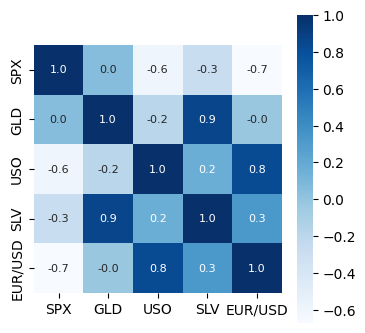

In [124]:
plt.figure(figsize = (4,4))
sns.heatmap(correlation, cbar=True, square=True,
            fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [125]:
gold_data=gold_data.drop(columns='Date',axis=1)

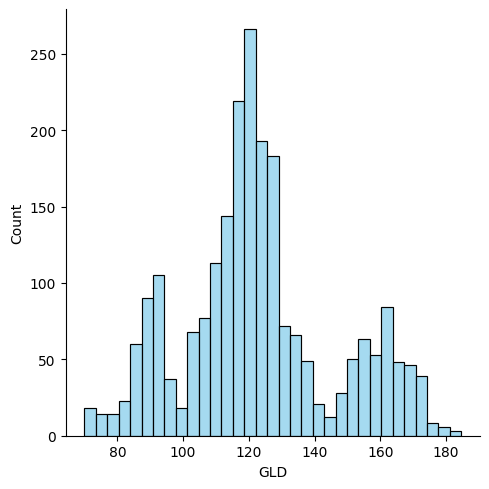

In [126]:
sns.displot(gold_data['GLD'],color='skyBlue')

## Spliting the data into Test and Train data

In [127]:
x = gold_data.drop(['GLD'],axis=1)
y = gold_data['GLD']

In [128]:
scaler=StandardScaler()

In [129]:
#standardizing the data
x=scaler.fit_transform(x)

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=52)

In [131]:
regressor = RandomForestRegressor(n_estimators=120)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=120)

## Prediction

In [132]:
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[119.01191593 117.99399868 160.13850113 117.18508322 105.74150053
 128.67558392  86.36941508  92.6097488  157.35383461 118.98591535
 111.68749995 163.34824885  87.14699788  87.57924867 115.49558207
 126.4325009   86.21333302 142.24466764  94.23700035 109.21249992
 144.96475223  90.6745006  125.43625003 135.09274872 124.29249907
 118.59966776 120.70108372  89.4069151  104.26900002 177.54641943
 112.2153337  107.1990009  111.06633244 128.52066619 117.13166698
 120.19508283 161.01674847 120.03049901 155.16650033 121.26216611
 113.92441552  91.586583   113.13616629 120.34016644 112.43666717
  91.70066797 130.0443321  129.09158503  88.18741583 176.45341407
 121.24558428 130.48508227 131.59308713 117.29608404 155.74774995
 137.59849798 114.86716566 159.77474943 137.22024584 167.57491441
  93.91525117 105.90283416 132.4547506  102.03708358 158.00641876
 127.33783277 118.10774993 122.63249873 132.78016831 160.78691479
 125.85216672  71.67225116  91.43450001 125.03466568 106.9496656
 104.434832

In [133]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print(f"R squared error: {error_score} ")

R squared error: 0.9937480395449939 


In [134]:
y_test = list(y_test)

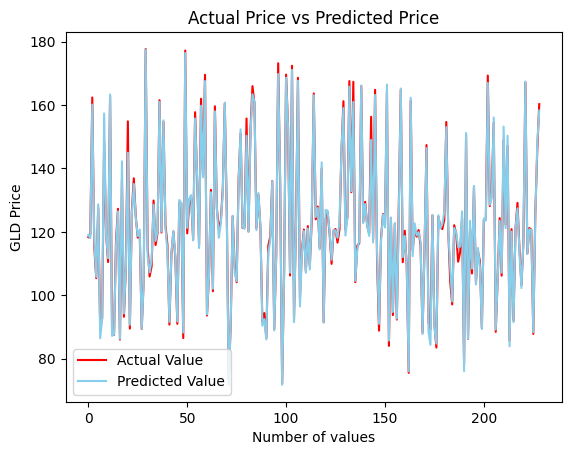

In [135]:
plt.plot(y_test, color='Red', label = 'Actual Value')
plt.plot(test_data_prediction, color='skyblue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()